Step 1: Install Required Libraries

In [6]:
pip install pandas numpy scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Step 2: Import Libraries

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Step 3: Load the Dataset

In [8]:
data = pd.read_csv(r"C:\Users\91822\OneDrive\Desktop\Oasis Infobyte\Oasis-Infobyte\Project 4\spam.csv", encoding='latin1')  # Use appropriate encoding
# Drop unnecessary columns
data


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
data = data[['v1', 'v2']]  # Adjust column names based on your dataset
data.columns = ['label', 'message']

In [10]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Step 4: Preprocess the Data

In [11]:
# Map labels to binary values
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Check the distribution of labels
print(data['label'].value_counts())


label
0    4825
1     747
Name: count, dtype: int64


C:\Users\91822\AppData\Local\Temp\ipykernel_11192\50491798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].map({'ham': 0, 'spam': 1})


Step 5: Split the Data

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)


Step 6: Vectorize the Text

In [13]:
# Vectorization
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


Step 7: Train the Model

In [14]:
# Train the model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)


MultinomialNB()

Step 8: Make Predictions

In [15]:
# Make predictions
y_pred = model.predict(X_test_vectorized)


Step 9: Evaluate the Model

In [16]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.98
Confusion Matrix:
[[963   2]
 [ 16 134]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Step 10: Save the Model 

In [17]:
import joblib

# Save the model
joblib.dump(model, 'spam_detector_model.pkl')


['spam_detector_model.pkl']

Step 11: Visualize the Confusion Matrix

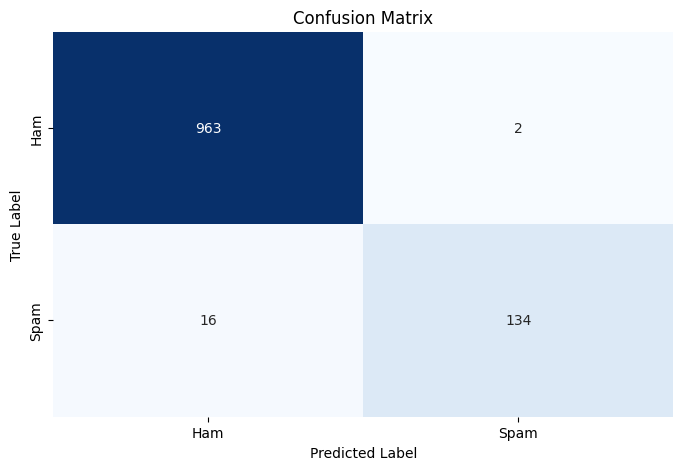

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [28]:
# Step 14: Length of Messages
data['message_length'] = data['message'].apply(len)

# Calculate average message lengths
average_message_length = data.groupby('label')['message_length'].mean()
print('Average Message Length:')
print(average_message_length)


Average Message Length:
label
0     71.023627
1    138.866131
Name: message_length, dtype: float64


C:\Users\91822\AppData\Local\Temp\ipykernel_11192\3388565174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['message_length'] = data['message'].apply(len)


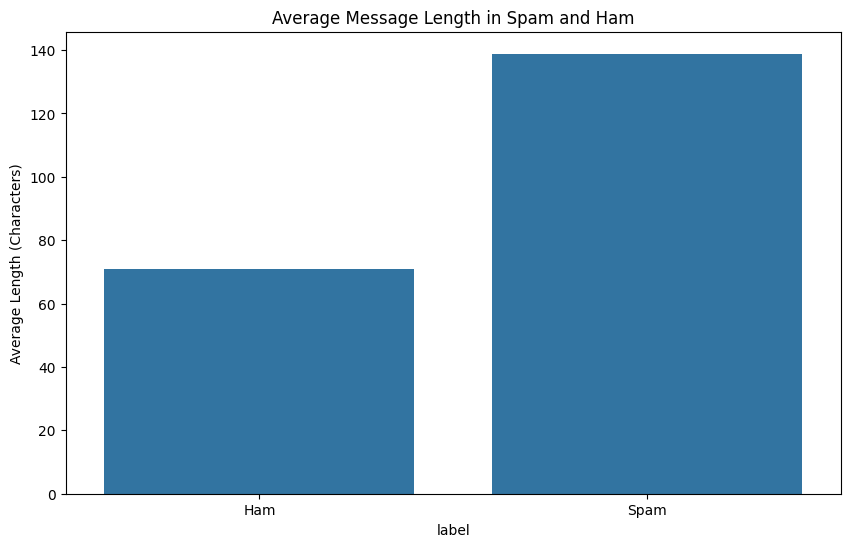

In [29]:
# Visualizing the average message length
plt.figure(figsize=(10, 6))
sns.barplot(x=average_message_length.index, y=average_message_length.values)
plt.title('Average Message Length in Spam and Ham')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.ylabel('Average Length (Characters)')
plt.show()
